## Step 1：讀入套件

In [1]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# import cv2
from tifffile import imread
from sklearn.model_selection import train_test_split

## Step 2：資料預處理

### 製作訓練集(訓練樣本)

In [3]:
# create x-train1

f = open("D:\\108semester\\108-2\\RS\\FE_rs\\data\\MtS-WH\\train\\first\\fname.txt")
lines = f.readlines()
img0 = imread("D:\\108semester\\108-2\\RS\\FE_rs\\data\\MtS-WH\\train\\first\\"+lines[1].strip())

for line in lines[2:]:
    img1 = imread("D:\\108semester\\108-2\\RS\\FE_rs\\data\\MtS-WH\\train\\first\\"+line.strip())
    img0 = np.append(img0, img1)

x_train1 = img0.reshape(190,150,150,4)
x_train1 = x_train1 / x_train1.max()    # normalization
print(x_train1)

[[[[0.16862745 0.18823529 0.14509804 0.1372549 ]
   [0.16470588 0.18431373 0.14117647 0.13333333]
   [0.17254902 0.18823529 0.14901961 0.14901961]
   ...
   [0.22745098 0.30588235 0.28627451 0.25098039]
   [0.22745098 0.30196078 0.27843137 0.24313725]
   [0.23137255 0.30588235 0.28627451 0.25490196]]

  [[0.17254902 0.19607843 0.15686275 0.15294118]
   [0.17254902 0.19215686 0.15294118 0.14901961]
   [0.16862745 0.18431373 0.14117647 0.14117647]
   ...
   [0.22352941 0.30196078 0.28235294 0.24705882]
   [0.23137255 0.30588235 0.28627451 0.25490196]
   [0.22745098 0.30196078 0.27843137 0.24313725]]

  [[0.17647059 0.20392157 0.16470588 0.16078431]
   [0.17254902 0.19215686 0.15294118 0.14901961]
   [0.16862745 0.18431373 0.14509804 0.14509804]
   ...
   [0.23137255 0.30980392 0.29411765 0.25882353]
   [0.23137255 0.30588235 0.28235294 0.25098039]
   [0.23137255 0.30588235 0.28235294 0.25098039]]

  ...

  [[0.17647059 0.19607843 0.14117647 0.10980392]
   [0.19215686 0.21960784 0.1764705

In [4]:
# create y-train1

y_train1 = []

for line in lines[1:]:
    ans = line.strip()[1]
    y_train1.append(int(ans))
    
y_train1 = np.array(y_train1)
y_train1 = to_categorical(y_train1, 9)  # one-hot encoding
print(y_train1)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [6]:
# create x-train2

f2 = open("D:\\108semester\\108-2\\RS\\FE_rs\\data\\MtS-WH\\train\\second\\fname2.txt")
lines2 = f2.readlines()
img2 = imread("D:\\108semester\\108-2\\RS\\FE_rs\\data\\MtS-WH\\train\\second\\"+lines2[1].strip())

for line in lines2[2:]:
    img3 = imread("D:\\108semester\\108-2\\RS\\FE_rs\\data\\MtS-WH\\train\\second\\"+line.strip())
    img2 = np.append(img2, img3)

x_train2 = img2.reshape(190,150,150,4)
x_train2 = x_train2 / x_train2.max()
print(x_train2)

[[[[0.22352941 0.29803922 0.2627451  0.24705882]
   [0.25490196 0.34509804 0.31764706 0.30196078]
   [0.29019608 0.4        0.38431373 0.37254902]
   ...
   [0.21568627 0.27058824 0.20392157 0.23137255]
   [0.20784314 0.25098039 0.18823529 0.21960784]
   [0.19607843 0.23529412 0.17254902 0.20392157]]

  [[0.28235294 0.40392157 0.37254902 0.36078431]
   [0.2745098  0.38823529 0.35294118 0.34117647]
   [0.25490196 0.35686275 0.31372549 0.30196078]
   ...
   [0.19215686 0.22745098 0.16078431 0.17647059]
   [0.16862745 0.18039216 0.10196078 0.11372549]
   [0.16470588 0.17647059 0.09803922 0.10980392]]

  [[0.25882353 0.36470588 0.3254902  0.31372549]
   [0.25882353 0.36470588 0.3254902  0.31372549]
   [0.25882353 0.36470588 0.3254902  0.31372549]
   ...
   [0.16078431 0.18039216 0.10588235 0.11764706]
   [0.2        0.23529412 0.16470588 0.18039216]
   [0.19607843 0.22745098 0.15686275 0.17254902]]

  ...

  [[0.28235294 0.38039216 0.34901961 0.32156863]
   [0.28627451 0.38823529 0.3568627

In [7]:
# create y-train2

y_train2 = []

for line in lines2[1:]:
    ans = line.strip()[1]
    y_train2.append(int(ans))
    
y_train2 = np.array(y_train2)
y_train2 = to_categorical(y_train2, 9)
print(y_train2)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [8]:
X_train = np.concatenate((x_train1, x_train2))
Y_train = np.concatenate((y_train1, y_train2))

### 製作測試集

In [9]:
from sklearn.model_selection import train_test_split
# X_test, X_val, Y_test, Y_val = train_test_split(x_test, y_test, test_size=0.25, random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.25, random_state=0)

### 檢視訓練集、測試集

In [10]:
print("X_train",X_train)
print("Y_train",Y_train)
print("x_test",X_test)
print("y_test",Y_test)

X_train [[[[0.16862745 0.19607843 0.12941176 0.28627451]
   [0.16470588 0.19215686 0.12156863 0.27843137]
   [0.16862745 0.19607843 0.1254902  0.28235294]
   ...
   [0.19607843 0.25882353 0.21960784 0.2627451 ]
   [0.19607843 0.2627451  0.22352941 0.2627451 ]
   [0.23529412 0.32156863 0.3254902  0.40784314]]

  [[0.17254902 0.20392157 0.1372549  0.29411765]
   [0.16862745 0.19607843 0.1254902  0.28627451]
   [0.16078431 0.18823529 0.11764706 0.2745098 ]
   ...
   [0.19215686 0.25098039 0.21176471 0.25098039]
   [0.23529412 0.32156863 0.29411765 0.3372549 ]
   [0.24705882 0.34117647 0.34509804 0.42745098]]

  [[0.16470588 0.19215686 0.1254902  0.28235294]
   [0.16078431 0.18431373 0.11372549 0.27058824]
   [0.17254902 0.2        0.13333333 0.29019608]
   ...
   [0.19607843 0.25882353 0.21960784 0.25882353]
   [0.2        0.27058824 0.23137255 0.2745098 ]
   [0.23921569 0.3254902  0.32941176 0.41176471]]

  ...

  [[0.16078431 0.2        0.12156863 0.32156863]
   [0.1372549  0.16078431 0

## Step 3：打造神經網路(CNN)

* Convolution Layer (捲積層)：6
* Pooling Layer (池化層)：3
* Hidden Layer (隱藏層)：2

In [11]:
CNN_layers = [Conv2D(64, (5, 5), padding='same', input_shape=(150, 150, 4), activation='relu', name='Conv_1'),
              Conv2D(64, (5, 5), padding='same', activation='relu', name='Conv_2'),
              MaxPooling2D(pool_size = (2,2)),

              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_3'),
              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_4'),
              Dropout(0.2),
              MaxPooling2D(pool_size = (2,2)),
              
              
              Conv2D(256, (3, 3), padding='same', activation='relu', name='Conv_5'),
              Conv2D(256, (3, 3), padding='same', activation='relu', name='Conv_6'),
              Dropout(0.2),
              MaxPooling2D(pool_size = (2,2))]

FC_layers = [Flatten(),
             Dense(units=256, activation='relu'),
             Dense(units=128, activation='relu'),
             Dense(units=9, activation='softmax')]

### 引入 ImageDataGenerator 提供訓練資料的變異性
* 旋轉、中心偏移、放大縮小等

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(featurewise_center=False,
                        samplewise_center=False,
                        rotation_range=8,
                        width_shift_range=0.08,
                        shear_range=0.3,
                        height_shift_range=0.08,
                        zoom_range=0.08,
                        data_format="channels_last")
gen.fit(X_train)
train_generator = gen.flow(X_train, Y_train, batch_size=30)

### 查看神經網路架構

In [13]:
model = Sequential(CNN_layers + FC_layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 150, 150, 64)      6464      
_________________________________________________________________
Conv_2 (Conv2D)              (None, 150, 150, 64)      102464    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 75, 75, 128)       73856     
_________________________________________________________________
Conv_4 (Conv2D)              (None, 75, 75, 128)       147584    
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 128)       0

### 組裝神經網路

In [14]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(),
              metrics=['categorical_accuracy'])

### 引入 ReduceLROnPlateau 
* 

In [16]:
# from tensorflow.keras.callbacks import ReduceLROnPlateau
# learning_rate_function = ReduceLROnPlateau(monitor="val_categorical_accuracy",
#                                            patience=3,
#                                            verbose=1,
#                                            factor=0.5,
#                                            min_lr=0.00001)

## Step 4：開始訓練模型

In [18]:
# history = model.fit_generator(train_generator,
#                               epochs=15,
#                               verbose=1,
#                               validation_data=(X_test, Y_test),
#                               callbacks=[learning_rate_function])

history = model.fit(X_train,
                    Y_train,
                    batch_size=10,
                    epochs=15,
                    verbose=1,
                    validation_data=(X_test, Y_test))

Epoch 1/15
29/29 [==============================] - 113s 4s/step - loss: 2.2910 - categorical_accuracy: 0.2281 - val_loss: 1.8090 - val_categorical_accuracy: 0.2526
Epoch 2/15
29/29 [==============================] - 126s 4s/step - loss: 1.7673 - categorical_accuracy: 0.2877 - val_loss: 1.7931 - val_categorical_accuracy: 0.2632
Epoch 3/15
29/29 [==============================] - 130s 4s/step - loss: 1.7091 - categorical_accuracy: 0.2982 - val_loss: 1.7030 - val_categorical_accuracy: 0.2737
Epoch 4/15
29/29 [==============================] - 122s 4s/step - loss: 1.6065 - categorical_accuracy: 0.3439 - val_loss: 1.6174 - val_categorical_accuracy: 0.3895
Epoch 5/15
29/29 [==============================] - 121s 4s/step - loss: 1.8346 - categorical_accuracy: 0.3053 - val_loss: 2.1189 - val_categorical_accuracy: 0.1263
Epoch 6/15
29/29 [==============================] - 123s 4s/step - loss: 1.9192 - categorical_accuracy: 0.2491 - val_loss: 1.8016 - val_categorical_accuracy: 0.2842
Epoch 7/15

In [19]:
score_train = model.evaluate(X_train, Y_train)
score_test = model.evaluate(X_test, Y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

3/3 [==============================] - 6s 2s/step - loss: 1.5636 - categorical_accuracy: 0.3789
Train Accuracy: 50.175440311431885
Test Accuracy: 37.8947377204895


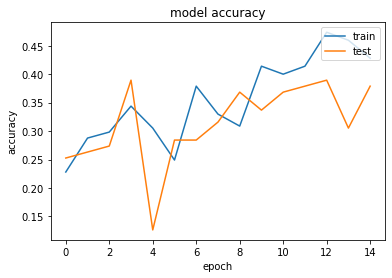

In [20]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

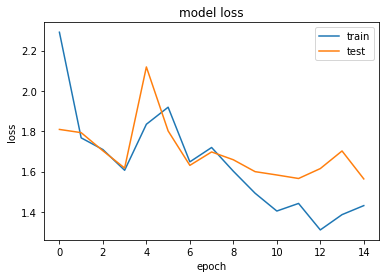

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [22]:
result = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [23]:
labelname_dict = {1:"parking lot",
                  2:"water",
                  3:"sparse houses",
                  4:"dense houses",
                  5:"residential region" ,  
                  6:"wasteland",
                  7:"vegetation region" ,  
                  8:"industrial region",
                  0:"undefined"
                 }

In [24]:
from ipywidgets import interact_manual

### 成果如下

In [25]:
def predict_xy(測試編號=0):
    ax = plt.gca()
    X = X_test[測試編號]
    plt.xticks([],[])
    plt.yticks([],[])
    plt.imshow(X_test[測試編號])
    print(f'神經網路預測的答案為: {labelname_dict[result[測試編號]]}')
interact_manual(predict_xy,測試編號=(0,len(X_test)-1))

interactive(children=(IntSlider(value=0, description='測試編號', max=94), Button(description='Run Interact', style…

<function __main__.predict_xy(測試編號=0)>

### 存取 model

In [26]:
model.save('myCNNmodel.h5')

### 讀入 model

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("myCNNmodel.h5")